In [1]:
import numpy as np
import pymc as mc
import matplotlib.pyplot as plt

In [11]:
N1 = mc.Poisson('N1', 10)
N2 = mc.Poisson('N2', 23)
N3 = mc.Poisson('N3', 11)
N4 = mc.Poisson('N4', 7)

@mc.deterministic(trace=True, plot=True)
def nsum(N1=N1, N2=N2, N3=N3, N4=N4):
    return N1+N2+N3+N4
model = mc.MCMC((N1, N2, N3, N4, nsum))

In [12]:
model.sample(20000)


 [-----------------100%-----------------] 20000 of 20000 complete in 3.1 sec[-------------    36%                  ] 7275 of 20000 complete in 1.0 sec

In [17]:
print(np.percentile(nsum.trace(), (25,75)))
print(np.percentile(N1.trace(), (25,75))+
     np.percentile(N2.trace(), (25,75))+
     np.percentile(N3.trace(), (25,75))+
     np.percentile(N4.trace(), (25,75)))
print(np.sqrt(10+23+11+7)+(10+23+11+7))

[ 46.  56.]
[ 42.  60.]
58.1414284285


Plotting N3
Plotting N4
Plotting N2
Plotting nsum
Plotting N1


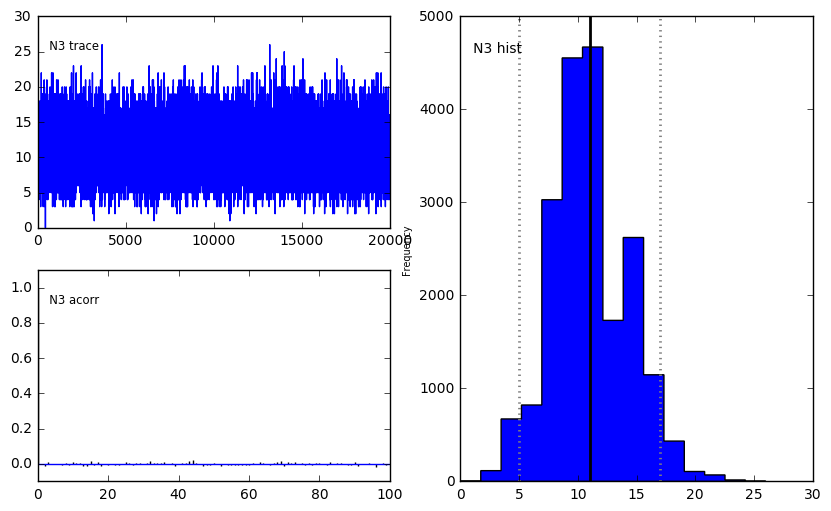

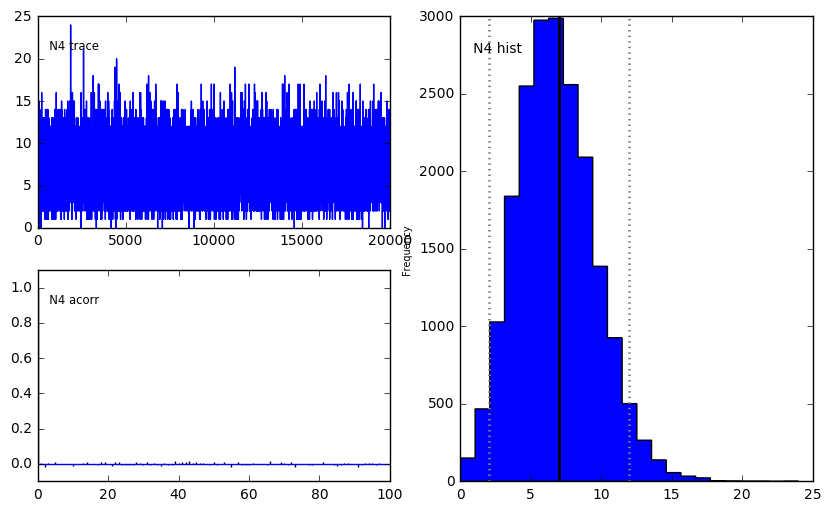

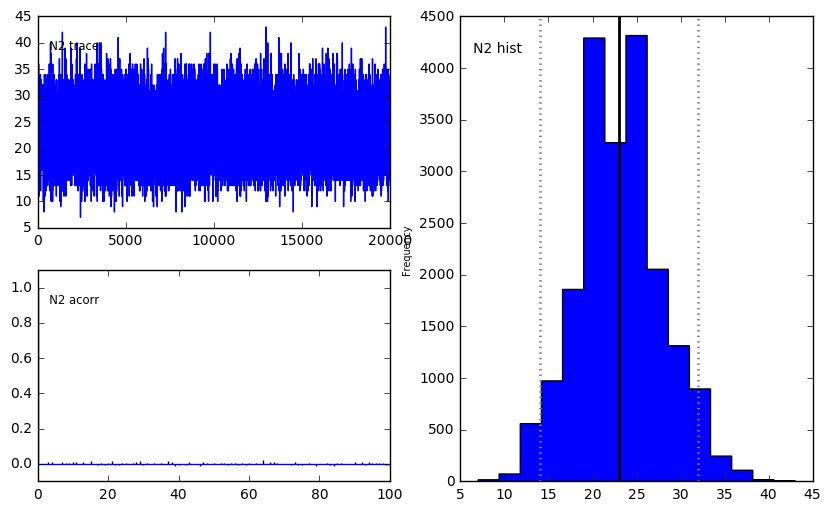

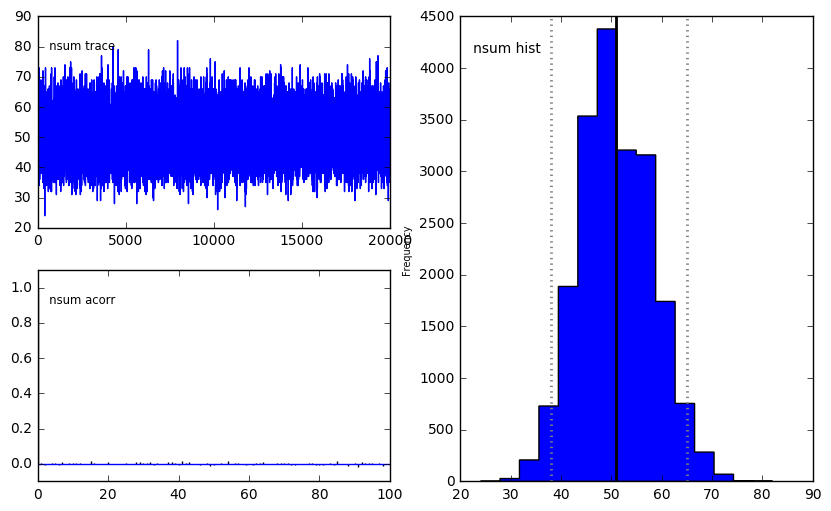

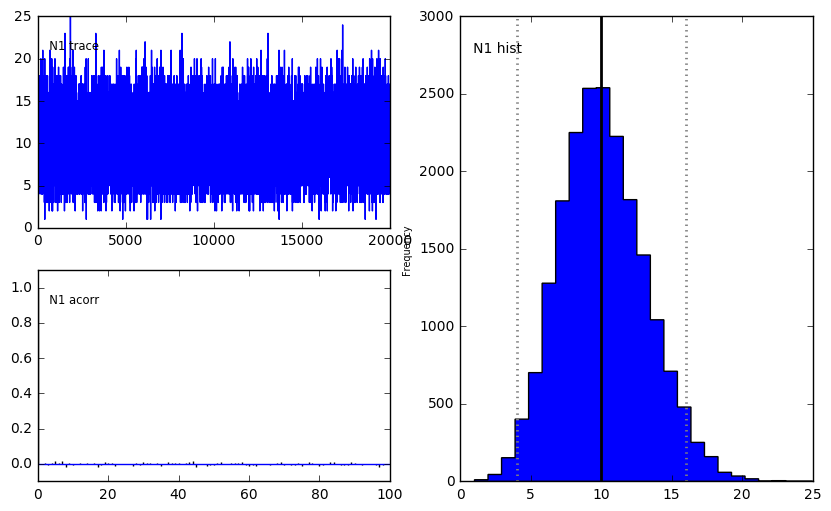

In [14]:
mc.Matplot.plot(model)